## 1- Importing Libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 2- Loading Image

In [6]:
original_image = cv.imread("adad.jpg", 0)

## 3- Plotting

Text(0.5, 1.0, 'Raw Result')

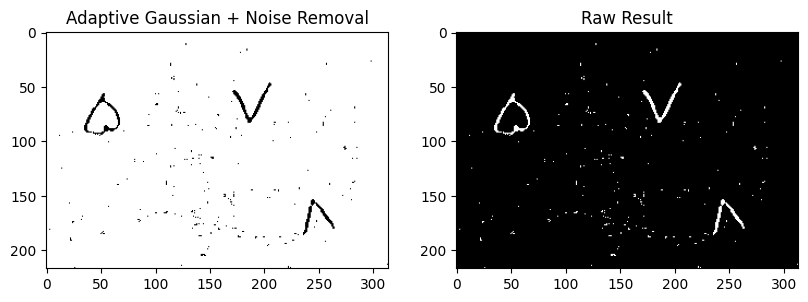

In [7]:
noise_removed_image = cv.medianBlur(original_image,5)

output = cv.adaptiveThreshold(noise_removed_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

raw_result = cv.bitwise_not(output)


plt.figure(figsize=[15,15])

plt.subplot(332);plt.imshow(output, cmap='gray');plt.title("Adaptive Gaussian + Noise Removal")
plt.subplot(333);plt.imshow(raw_result, cmap='gray');plt.title("Raw Result")

Text(0.5, 1.0, 'Labeled Image')

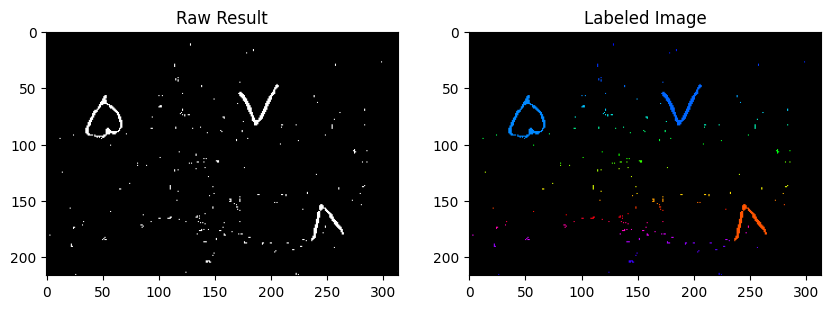

In [8]:
num_labels, labels = cv.connectedComponents(raw_result)

label_hue = np.uint8(179*labels/np.max(labels))
blank = np.ones_like(raw_result) * 255
labeled_img = cv.merge([label_hue, blank, blank])

labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

labeled_img[label_hue==0] = 0


plt.figure(figsize=[10,10])

plt.subplot(121);plt.imshow(raw_result, cmap='gray');plt.title("Raw Result")
plt.subplot(122);plt.imshow(labeled_img, cmap='gray');plt.title("Labeled Image")